# Transfer labels from Peng, Regev, Ding for Malignant/ Non-Malignant Classificaiton to final integration

In [3]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import numpy as np
# import xgboost as xgb
import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

In [2]:
adata = sc.read_h5ad('/home/aih/shrey.parikh/PDAC/PDAC/scIB_metrics_toolbox/datasets_metrics/scPoli/scPoli_donor_reference_latent_label_transfer_metrics.h5ad')

In [3]:
adata.obs_names

Index(['GCGTTTCAGCATTTGC-1-0-0', 'AACAACCAGCTCGCAC-1-0-0',
       'ACTGTCCTCTTAAGGC-1-0-0', 'CTATCCGAGCCTATTG-1-0-0',
       'GACCTTCTCCGCTGTT-1-0-0', 'TTTCACAGTTATTCCT-1-0-0',
       'ATTACTCAGGCTCCCA-1-0-0', 'TGCACGGAGCAACTCT-1-0-0',
       'TTATTGCAGTTGCCTA-1-0-0', 'GCAGCCATCCGTATAG-1-0-0',
       ...
       'TTTGTTGCACGCCACA-1-1', 'TTTGTTGCAGAAACCG-1-1', 'TTTGTTGCATCCCGTT-1-1',
       'TTTGTTGCATCCGTGG-1-1', 'TTTGTTGGTATCCCAA-1-1', 'TTTGTTGGTCCATAGT-1-1',
       'TTTGTTGGTTGATGTC-1-1', 'TTTGTTGTCAAACCTG-1-1', 'TTTGTTGTCCTCTAAT-1-1',
       'TTTGTTGTCGTGTGAT-1-1'],
      dtype='object', length=837983)

In [4]:
regev = sc.read_h5ad('/home/aih/shrey.parikh/PDAC/PDAC/processed_datasets/All_genes/Regev_PDAC.h5ad')
peng = sc.read_h5ad('/home/aih/shrey.parikh/PDAC/PDAC/inferCNV/Peng/PDAC_Peng_inferCNV.h5ad')
ding = sc.read_h5ad('/home/aih/shrey.parikh/PDAC/PDAC/processed_datasets/All_genes/Ding_PDAC_annotated.h5ad')
zenodo = sc.read_h5ad('/home/aih/shrey.parikh/PDAC/PDAC/inferCNV/Zenodo_OUGS/PDAC_Zenodo_OUGS_inferCNV.h5ad')


In [5]:
metadata = pd.read_table('/home/aih/shrey.parikh/PDAC/PDAC/Classifier/Spatial_PDAC_Metadata_Celltypes.txt')

In [6]:
def map_obs_column(source_adata, target_adata, column_name, extension):
    if column_name not in source_adata.obs.columns:
        raise ValueError(f"Column '{column_name}' does not exist in source adata.")

    # Create mapping dictionary from source_adata
    source_keys = source_adata.obs_names.str.split('-').str[0]
    mapping_dict = dict(zip(source_keys, source_adata.obs[column_name]))

    # Initialize the new column in target_adata with NaN
    target_adata.obs[f"{column_name}_{extension}"] = np.nan

    # Apply the mapping only to the subset where 'Dataset' column matches the extension
    subset_indices = target_adata.obs['Dataset'] == extension
    print(f"Number of cells in the '{extension}' dataset: {subset_indices.sum()}")
    target_keys = target_adata.obs_names[subset_indices].str.split('-').str[0]
    target_adata.obs.loc[subset_indices, f"{column_name}_{extension}"] = target_keys.map(mapping_dict)

    # Count the number of non-null (mapped) annotations in the subset of target_adata
    mapped_count = target_adata.obs.loc[subset_indices, f"{column_name}_{extension}"].notnull().sum()
    print(f"Number of cells with mapped annotations in the '{extension}' dataset: {mapped_count}")
    
    return target_adata

In [7]:
for i in ['Level 1 Annotation', 'Level 2 Annotation', 'Level 3 Annotation']:
    map_obs_column(regev, adata, i, 'Regev')

Number of cells in the 'Regev' dataset: 192044
Number of cells with mapped annotations in the 'Regev' dataset: 192044
Number of cells in the 'Regev' dataset: 192044
Number of cells with mapped annotations in the 'Regev' dataset: 192044
Number of cells in the 'Regev' dataset: 192044
Number of cells with mapped annotations in the 'Regev' dataset: 192044


In [8]:
for i in ['Cell_type', 'Malignant Classification']:
    map_obs_column(peng, adata, i, 'Peng')

Number of cells in the 'Peng' dataset: 41964
Number of cells with mapped annotations in the 'Peng' dataset: 41964
Number of cells in the 'Peng' dataset: 41964
Number of cells with mapped annotations in the 'Peng' dataset: 41964


In [9]:
for dataset in zenodo.obs.Dataset.unique():
    globals()[str(dataset)] = zenodo[zenodo.obs.Dataset == dataset]

In [10]:
for i in ['Cell_type', 'Malignant Classification']:
    map_obs_column(Zenodo_OUGS, adata, i, 'Zenodo_OUGS')

Number of cells in the 'Zenodo_OUGS' dataset: 11298
Number of cells with mapped annotations in the 'Zenodo_OUGS' dataset: 11298
Number of cells in the 'Zenodo_OUGS' dataset: 11298
Number of cells with mapped annotations in the 'Zenodo_OUGS' dataset: 11298


### modify the function for barcodes

In [11]:
def map_obs_column(source_adata, target_adata, column_name, extension):
    if column_name not in source_adata.obs.columns:
        raise ValueError(f"Column '{column_name}' does not exist in source adata.")

    # Extract the relevant part from source obs_names
    source_keys = source_adata.obs_names.str.rsplit('-', n=1).str[0]
    # print(source_keys)
    mapping_dict = dict(zip(source_keys, source_adata.obs[column_name]))

    # Initialize the new column in target_adata with NaN
    target_adata.obs[f"{column_name}_{extension}"] = np.nan

    # Apply the mapping only to the subset where 'Dataset' column matches the extension
    subset_indices = target_adata.obs['Dataset'] == extension
    print(f"Number of cells in the '{extension}' dataset: {subset_indices.sum()}")
    
    # Extract the relevant part from target obs_names
    target_keys = target_adata.obs_names[subset_indices].str.rsplit('-', n=1).str[0]
    # print(target_keys)

    # Map the values
    for target_key, idx in zip(target_keys, subset_indices[subset_indices].index):
        if target_key in mapping_dict:
            target_adata.obs.at[idx, f"{column_name}_{extension}"] = mapping_dict[target_key]

    # Count the number of non-null (mapped) annotations in the subset of target_adata
    mapped_count = target_adata.obs.loc[subset_indices, f"{column_name}_{extension}"].notnull().sum()
    print(f"Number of cells with mapped annotations in the '{extension}' dataset: {mapped_count}")

    return target_adata

In [12]:
for i in ['Cell_type', 'Malignant Classification']:
    map_obs_column(Moncada, adata, i, 'Moncada')

Number of cells in the 'Moncada' dataset: 3625
Number of cells with mapped annotations in the 'Moncada' dataset: 3625
Number of cells in the 'Moncada' dataset: 3625
Number of cells with mapped annotations in the 'Moncada' dataset: 3625


In [13]:
for i in ['Cell_type', 'Malignant Classification']:
    map_obs_column(Schlesinger, adata, i, 'Schlesinger')

Number of cells in the 'Schlesinger' dataset: 4874
Number of cells with mapped annotations in the 'Schlesinger' dataset: 4874
Number of cells in the 'Schlesinger' dataset: 4874
Number of cells with mapped annotations in the 'Schlesinger' dataset: 4874


## rushin has 21 unique donor lacks: 'HT224P1','HT231P1','HT232P1','HT242P1','HT259P1','HT264P1','HT270P1','HT284P1','HT288P1','HT306P1','HT412P1'
## I have all the donors
## Modified the function to split by donor and then add the annotation

In [14]:
## 'HT264P1','HT270P1','HT284P1','HT288P1','HT224P1','HT231P1','HT232P1','HT259P1','HT306P1','HT242P1','HT412P1' are snRNA-seq datasets
## replace HT185B1 with HT185P1, seems like a typo

In [15]:
list_cond = ['HT264P1',
 'HT270P1',
 'HT284P1',
 'HT288P1',
 'HT224P1',
 'HT231P1',
 'HT232P1',
 'HT259P1',
 'HT306P1',
 'HT242P1',
 'HT412P1']

In [16]:
adata.obs.Condition = np.where(adata.obs.ID.isin(list_cond), 'snRNA-seq', adata.obs.Condition)

In [17]:
adata.obs.groupby(['Condition', 'Dataset']).size()

Condition  Dataset    
scRNA-seq  Caronni         75280
           Ding           152124
           Lee              8897
           Moncada          3625
           Peng            41964
           Regev               0
           Schlesinger      4874
           Simeone        213711
           Steele          37218
           Zenodo_OUGS     11298
           Zhang           37934
snRNA-seq  Caronni             0
           Ding            59014
           Lee                 0
           Moncada             0
           Peng                0
           Regev          192044
           Schlesinger         0
           Simeone             0
           Steele              0
           Zenodo_OUGS         0
           Zhang               0
dtype: int64

In [19]:
def map_obs_column_donor(source_adata, target_adata, column_name, extension, donor_list):
    if column_name not in source_adata.obs.columns:
        raise ValueError(f"Column '{column_name}' does not exist in source adata.")

    # Create mapping dictionary from source_adata
    source_keys = source_adata.obs_names.str.split('-').str[0]
    mapping_dict = dict(zip(source_keys, source_adata.obs[column_name]))

    # Initialize the new column in target_adata with NaN
    target_adata.obs[f"{column_name}_{extension}"] = np.nan

    # Apply the mapping only to the subset where 'Dataset' column matches the extension
    for donor in donor_list:
        subset_indices = target_adata.obs['ID'] == donor
        print(f"Number of cells in the '{donor}': {subset_indices.sum()}")
        target_keys = target_adata.obs_names[subset_indices].str.split('-').str[0]
        target_adata.obs.loc[subset_indices, f"{column_name}_{extension}"] = target_keys.map(mapping_dict)

        # Count the number of non-null (mapped) annotations in the subset of target_adata
        mapped_count = target_adata.obs.loc[subset_indices, f"{column_name}_{extension}"].notnull().sum()
        print(f"Number of cells with mapped annotations in the '{extension}' dataset: {mapped_count}")
        
    return target_adata

In [18]:
def map_obs_column_donor(source_adata, target_adata, column_name, extension, donor_list, donor_results={}):
    if column_name not in source_adata.obs.columns:
        raise ValueError(f"Column '{column_name}' does not exist in source adata.")

    # Initialize the dictionary to store results
    # donor_results = {}

    # Create mapping dictionary from source_adata
    source_keys = source_adata.obs_names.str.split('-').str[0]
    mapping_dict = dict(zip(source_keys, source_adata.obs[column_name]))

    # Initialize the new column in target_adata with NaN
    target_adata.obs[f"{column_name}_{extension}"] = np.nan

    # Apply the mapping only to the subset where 'Dataset' column matches the extension
    for donor in donor_list:
        subset_indices = target_adata.obs['ID'] == donor
        total_cells = subset_indices.sum()
        print(f"Number of cells in the '{donor}': {total_cells}")
        
        target_keys = target_adata.obs_names[subset_indices].str.split('-').str[0]
        target_adata.obs.loc[subset_indices, f"{column_name}_{extension}"] = target_keys.map(mapping_dict)

        mapped_count = target_adata.obs.loc[subset_indices, f"{column_name}_{extension}"].notnull().sum()
        print(f"Number of cells with mapped annotations in the '{extension}' dataset: {mapped_count}")

        # Store the results in the dictionary
        donor_results[donor] = {'total_cells': total_cells, 'mapped_cells': mapped_count}

    return donor_results, target_adata

In [19]:
ding_raw = sc.read_h5ad('/lustre/groups/ml01/workspace/shrey.parikh/PDAC/raw_data/Ding/data/Liding.h5ad')

In [20]:
# replace ID 'HT185B1' in adata with 'HT185P1'
adata.obs['ID'] = adata.obs['ID'].replace('HT185B1', 'HT185P1')

In [21]:
donor_list = adata[(adata.obs.Dataset == 'Ding') & (adata.obs.Condition == 'scRNA-seq')].obs.ID.unique()
donor_list

['HT056P1', 'HT060P1', 'HT061P1', 'HT064P1', 'HT071P1', ..., 'HT185P1', 'HT190P1', 'HT191P1', 'HT200P1', 'HT204P1']
Length: 21
Categories (21, object): ['HT056P1', 'HT060P1', 'HT061P1', 'HT064P1', ..., 'HT190P1', 'HT191P1', 'HT200P1', 'HT204P1']

In [22]:
donor_results = {}
for i in ['cell_types', 'Label_Harmonized']:
    map_obs_column_donor(ding, adata, i, 'Ding', donor_list, donor_results)

Number of cells in the 'HT056P1': 7716
Number of cells with mapped annotations in the 'Ding' dataset: 4337
Number of cells in the 'HT060P1': 5835
Number of cells with mapped annotations in the 'Ding' dataset: 5422
Number of cells in the 'HT061P1': 3609
Number of cells with mapped annotations in the 'Ding' dataset: 2878
Number of cells in the 'HT064P1': 3928
Number of cells with mapped annotations in the 'Ding' dataset: 3157
Number of cells in the 'HT071P1': 2823
Number of cells with mapped annotations in the 'Ding' dataset: 2585
Number of cells in the 'HT085P1': 1301
Number of cells with mapped annotations in the 'Ding' dataset: 1010
Number of cells in the 'HT115P1': 5544
Number of cells with mapped annotations in the 'Ding' dataset: 4769
Number of cells in the 'HT121P1': 3735
Number of cells with mapped annotations in the 'Ding' dataset: 3347
Number of cells in the 'HT122P1': 8846
Number of cells with mapped annotations in the 'Ding' dataset: 5762
Number of cells in the 'HT123P1': 115

In [23]:
donor_results

{'HT056P1': {'total_cells': 7716, 'mapped_cells': 4337},
 'HT060P1': {'total_cells': 5835, 'mapped_cells': 5422},
 'HT061P1': {'total_cells': 3609, 'mapped_cells': 2878},
 'HT064P1': {'total_cells': 3928, 'mapped_cells': 3157},
 'HT071P1': {'total_cells': 2823, 'mapped_cells': 2585},
 'HT085P1': {'total_cells': 1301, 'mapped_cells': 1010},
 'HT115P1': {'total_cells': 5544, 'mapped_cells': 4769},
 'HT121P1': {'total_cells': 3735, 'mapped_cells': 3347},
 'HT122P1': {'total_cells': 8846, 'mapped_cells': 5762},
 'HT123P1': {'total_cells': 11565, 'mapped_cells': 10107},
 'HT124P1': {'total_cells': 3520, 'mapped_cells': 3090},
 'HT125P1': {'total_cells': 18621, 'mapped_cells': 16950},
 'HT138P1': {'total_cells': 10752, 'mapped_cells': 6010},
 'HT140P1': {'total_cells': 9268, 'mapped_cells': 5898},
 'HT166P1': {'total_cells': 10876, 'mapped_cells': 8156},
 'HT168P1': {'total_cells': 14178, 'mapped_cells': 10372},
 'HT185P1': {'total_cells': 4933, 'mapped_cells': 4711},
 'HT190P1': {'total_cel

In [24]:
group1 = adata[adata.obs.Dataset == 'Ding'].obs.groupby('ID').size()
group_keys = ding.obs_names.str.split('v').str[1].str.split('_').str[0]
group2 = ding.obs.groupby(group_keys).size()
ding_raw.obs.sampleid = ding_raw.obs.sampleid.replace('HT056P', 'HT056P1')
group3 = ding_raw.obs.groupby('sampleid').size()

# Combine these series into a DataFrame
combined_df = pd.concat([group1, group2, group3], axis=1, keys=['Int', 'ding_rushin', 'ding_raw'])

In [25]:
donor_results_df = pd.DataFrame.from_dict(donor_results, orient='index').reset_index()
donor_results_df.columns = ['Donor', 'Total_Cells', 'Mapped_Cells']
combined_df = pd.concat([combined_df, donor_results_df.set_index('Donor')], axis=1)


In [26]:
combined_df['% mapped'] = ((combined_df['Mapped_Cells'])/ combined_df['Int'] * 100).round(2) 

In [27]:
combined_df

,Int,ding_rushin,ding_raw,Total_Cells,Mapped_Cells,% mapped
HT056P1,7716.0,8786.0,9666,7716.0,4337.0,56.21
HT060P1,5835.0,23214.0,6927,5835.0,5422.0,92.92
HT061P1,3609.0,6119.0,5337,3609.0,2878.0,79.75
HT064P1,3928.0,6550.0,5268,3928.0,3157.0,80.37
HT071P1,2823.0,5515.0,3376,2823.0,2585.0,91.57
HT085P1,1301.0,2211.0,2048,1301.0,1010.0,77.63
HT115P1,5544.0,8098.0,6449,5544.0,4769.0,86.02
HT121P1,3735.0,5701.0,4142,3735.0,3347.0,89.61
HT122P1,8846.0,11877.0,11651,8846.0,5762.0,65.14
HT123P1,11565.0,13388.0,12303,11565.0,10107.0,87.39


<Axes: xlabel='Total_Cells', ylabel='% mapped'>

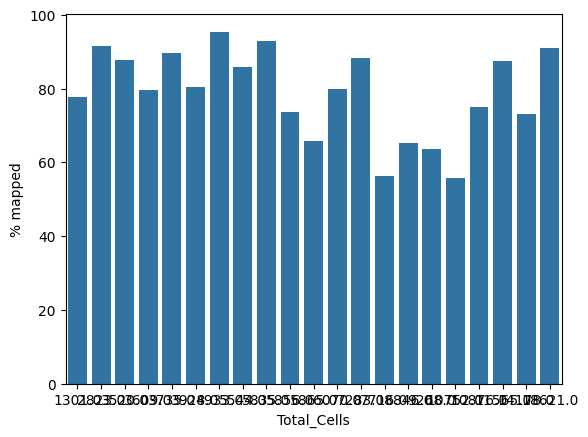

In [28]:
sns.barplot(data=combined_df, x='Total_Cells', y='% mapped')

In [29]:
# adata.obs.drop(columns=['Cell_type_Zenodo','Malignant Classification_Zenodo'], inplace=True)

In [30]:
adata.obs.drop(columns=['Level 1 Annotation',
       'Level 2 Annotation', 'Level 3 Annotation', 'Cell_type'], inplace=True)

In [31]:
adata.obs.drop(columns=['batch','classifier_outcome'], inplace=True)

In [32]:
adata.obs.columns

Index(['Dataset', 'ID', 'pseudo_barcode', 'scanvi_labels', 'Label_Harmonized',
       'conditions_combined', 'cell_type_pred', 'cell_type_uncert',
       'Label_Harmonized_pred', 'Label_Harmonized_uncert', 'query',
       'scpoli_labels', 'Condition', 'Level 1 Annotation_Regev',
       'Level 2 Annotation_Regev', 'Level 3 Annotation_Regev',
       'Cell_type_Peng', 'Malignant Classification_Peng',
       'Cell_type_Zenodo_OUGS', 'Malignant Classification_Zenodo_OUGS',
       'Cell_type_Moncada', 'Malignant Classification_Moncada',
       'Cell_type_Schlesinger', 'Malignant Classification_Schlesinger',
       'cell_types_Ding', 'Label_Harmonized_Ding'],
      dtype='object')

In [33]:
adata.obs['Malignant_Classification_Regev'] = np.nan

# Apply the condition only to the subset where Dataset is 'Regev'
regev_indices = adata.obs['Dataset'] == 'Regev'
adata.obs.loc[regev_indices, 'Malignant_Classification_Regev'] = np.where(
    adata.obs.loc[regev_indices, 'Level 3 Annotation_Regev'].str.contains('Malignant'),
    'Malignant',
    'Non-Malignant'
)

In [34]:
adata.obs.groupby(['Malignant_Classification_Regev', 'Dataset']).size()

Malignant_Classification_Regev  Dataset    
Malignant                       Caronni             0
                                Ding                0
                                Lee                 0
                                Moncada             0
                                Peng                0
                                Regev           52904
                                Schlesinger         0
                                Simeone             0
                                Steele              0
                                Zenodo_OUGS         0
                                Zhang               0
Non-Malignant                   Caronni             0
                                Ding                0
                                Lee                 0
                                Moncada             0
                                Peng                0
                                Regev          139140
                                Schles

In [35]:
adata[adata.obs.Dataset == 'Ding'].obs.Label_Harmonized_Ding.unique()

array(['Myeloid Cell', 'CAF', nan, 'T Cell', 'Macrophage',
       'Natural killer', 'Malignant Epithelial Cell', 'Tuft Cell',
       'B cell', 'Pericyte', 'Endothelial Cell', 'Ductal Cell',
       'Endocrine Cell', 'Erythrocyte', 'Acinar cell', 'Epithelial'],
      dtype=object)

In [36]:
adata.obs['Malignant_Classification_Ding'] = np.nan
adata.obs.Label_Harmonized_Ding = adata.obs.Label_Harmonized_Ding.astype(str)
# Apply the condition only to the subset where Dataset is 'Regev'
ding_indices = adata.obs['Dataset'] == 'Ding'
adata.obs.loc[ding_indices, 'Malignant_Classification_Ding'] = np.where(
    adata.obs.loc[ding_indices, 'Label_Harmonized_Ding'].str.contains('Malignant'),
    'Malignant',
    'Non-Malignant'
)

In [37]:
adata.obs.groupby(['Malignant_Classification_Ding', 'Dataset']).size()

Malignant_Classification_Ding  Dataset    
Malignant                      Caronni             0
                               Ding            10341
                               Lee                 0
                               Moncada             0
                               Peng                0
                               Regev               0
                               Schlesinger         0
                               Simeone             0
                               Steele              0
                               Zenodo_OUGS         0
                               Zhang               0
Non-Malignant                  Caronni             0
                               Ding           200797
                               Lee                 0
                               Moncada             0
                               Peng                0
                               Regev               0
                               Schlesinger         0
   

In [38]:
adata.obs.columns.str.contains('Classification')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False,  True, False, False,  True,
        True])

In [39]:
classification_columns = adata.obs.columns.str.contains('Classification')
adata.obs = adata.obs.astype(str)
adata.obs['Malignant_Classification'] = adata.obs.apply(lambda row: 'Malignant' if 'Malignant' in row[classification_columns].values else 'Non-Malignant', axis=1)

In [40]:
malignant_df = adata.obs.groupby(['Malignant_Classification', 'Dataset']).size().unstack()

In [41]:
malignant_df['Total'] = adata.obs.groupby(['Malignant_Classification', 'Dataset']).size().unstack().T.sum()

In [45]:
malignant_df

Dataset,Caronni,Ding,Lee,Moncada,Peng,Regev,Schlesinger,Simeone,Steele,Zenodo_OUGS,Zhang,Total
Malignant_Classification,,,,,,,,,,,,
Malignant,NaN,10341.0,NaN,3121.0,2573.0,52904.0,125.0,NaN,NaN,24.0,NaN,69088.0
Non-Malignant,75280.0,200797.0,8897.0,504.0,39391.0,139140.0,4749.0,213711.0,37218.0,11274.0,37934.0,768895.0


In [46]:
adata.obsm['X_umap'] = adata.obsm['X_umap_emb']

In [47]:
adata.write('/home/aih/shrey.parikh/PDAC/PDAC/Classifier/scpoli_int_donor_final.h5ad')

In [4]:
adata = sc.read_h5ad('/home/aih/shrey.parikh/PDAC/PDAC/Classifier/scpoli_int_donor_final.h5ad')

In [5]:
adata.obs = adata.obs.astype('category')

/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


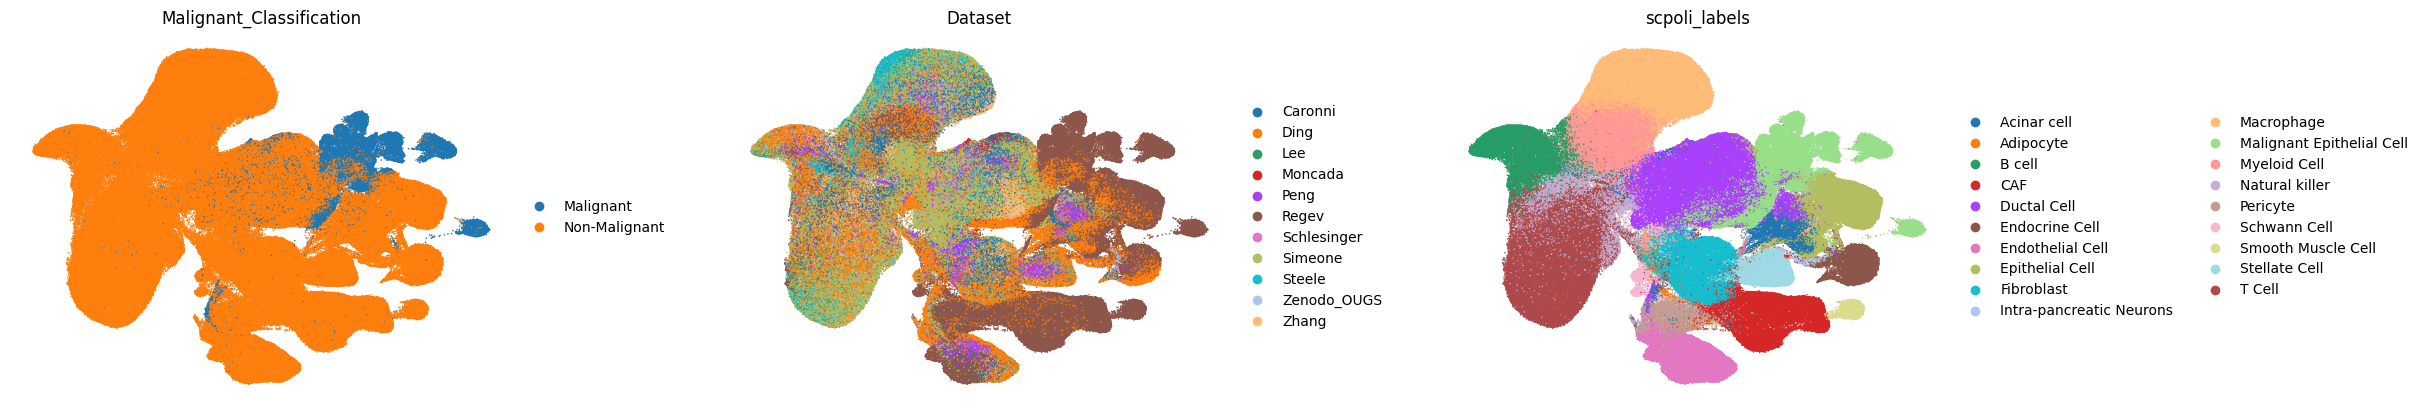

In [49]:
random_indices = np.random.permutation(list(range(adata.shape[0])))
sc.pl.umap(adata[random_indices, :], color=['Malignant_Classification', 'Dataset', 'scpoli_labels'], frameon=False, size=5, wspace=0.3)

In [6]:
classification_columns = []
for cols in adata.obs.columns:
    if 'Classification' in cols:
        classification_columns.append(cols)

In [7]:
adata.obs = adata.obs.replace('nan', np.nan)

/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packa

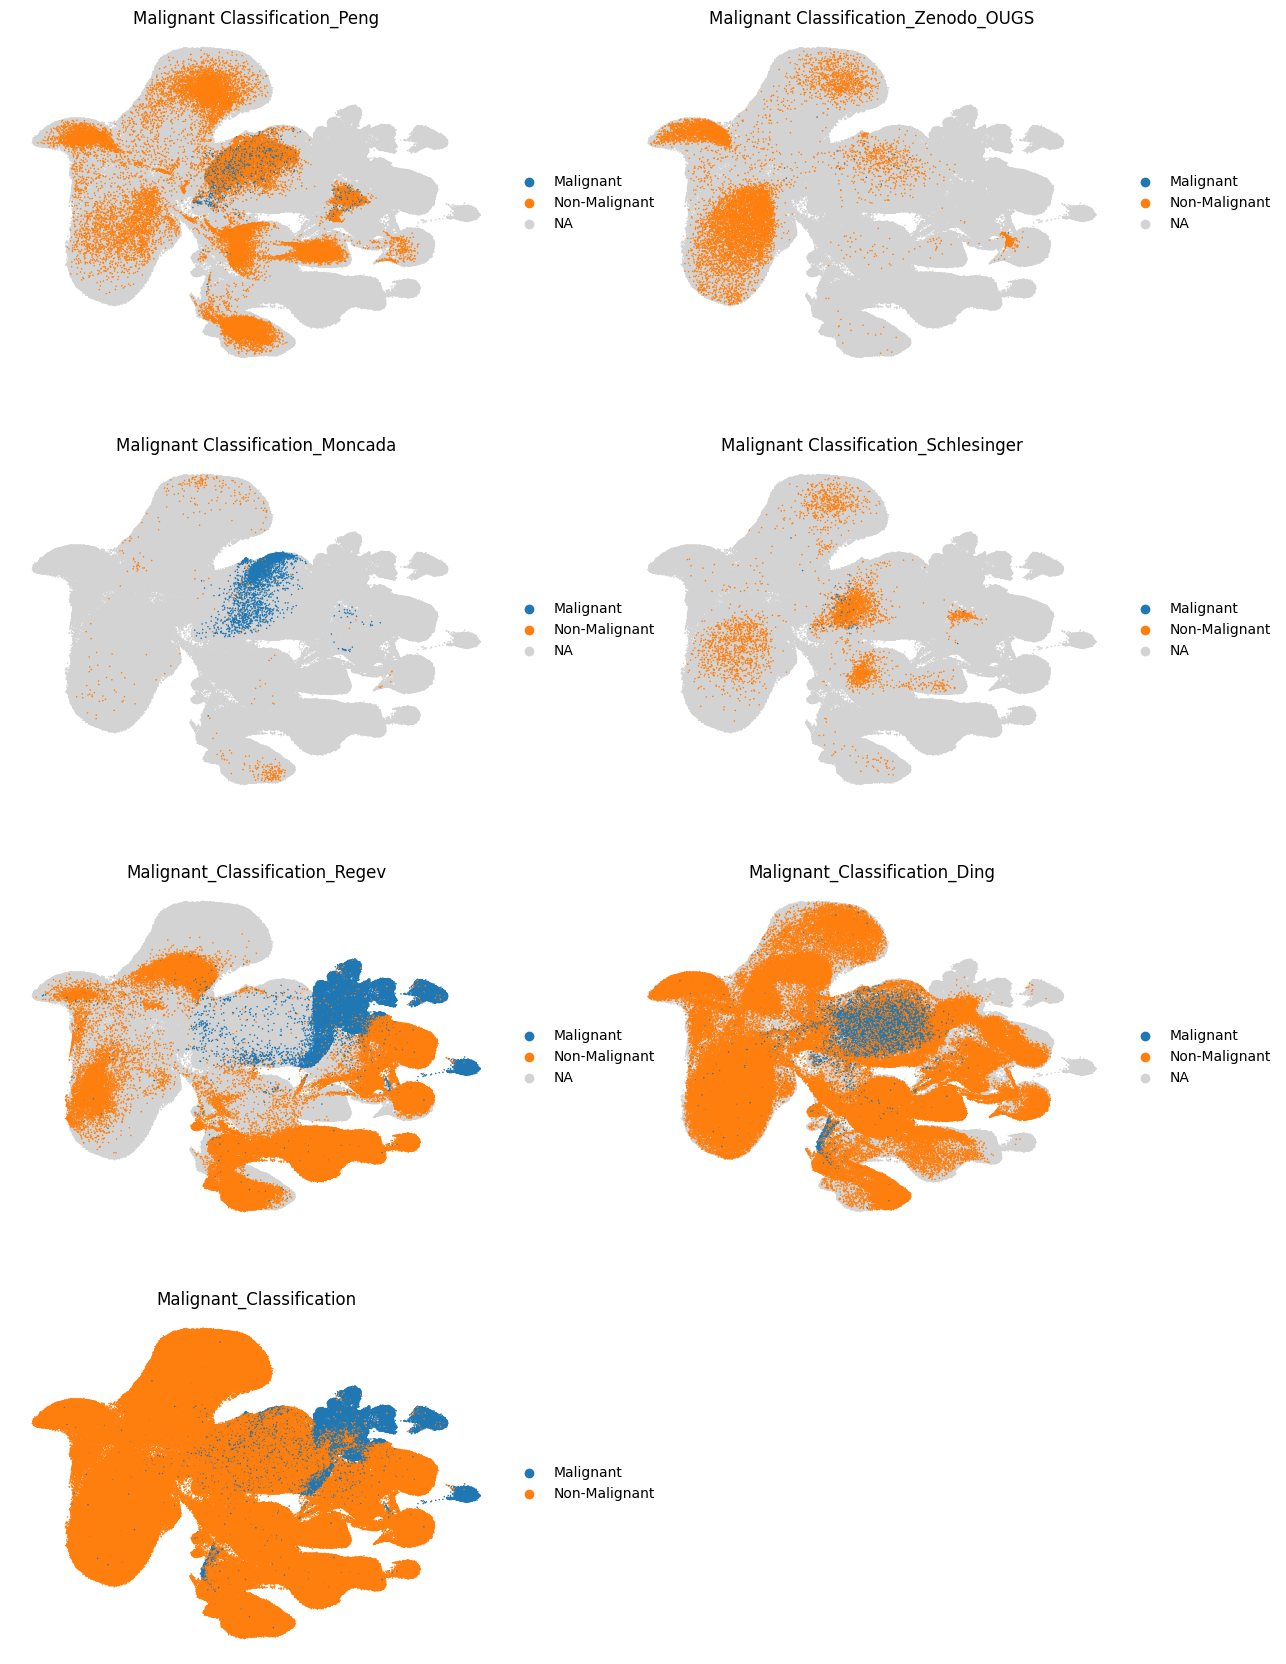

In [62]:
random_indices = np.random.permutation(list(range(adata.shape[0])))
sc.pl.umap(adata[random_indices, :], color=classification_columns, frameon=False, size=5, ncols=2)

In [63]:
adata.obs.groupby(['Label_Harmonized_Ding', 'Dataset']).size().unstack()

Dataset,Caronni,Ding,Lee,Moncada,Peng,Regev,Schlesinger,Simeone,Steele,Zenodo_OUGS,Zhang
Label_Harmonized_Ding,,,,,,,,,,,
Acinar cell,0,290,0,0,0,0,0,0,0,0,0
B cell,0,11078,0,0,0,0,0,0,0,0,0
CAF,0,19461,0,0,0,0,0,0,0,0,0
Ductal Cell,0,1433,0,0,0,0,0,0,0,0,0
Endocrine Cell,0,593,0,0,0,0,0,0,0,0,0
Endothelial Cell,0,8718,0,0,0,0,0,0,0,0,0
Epithelial,0,887,0,0,0,0,0,0,0,0,0
Erythrocyte,0,259,0,0,0,0,0,0,0,0,0
Macrophage,0,4576,0,0,0,0,0,0,0,0,0


In [8]:
random_indices = np.random.permutation(list(range(adata.shape[0])))
adata_umap = adata[random_indices, :].copy()

/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


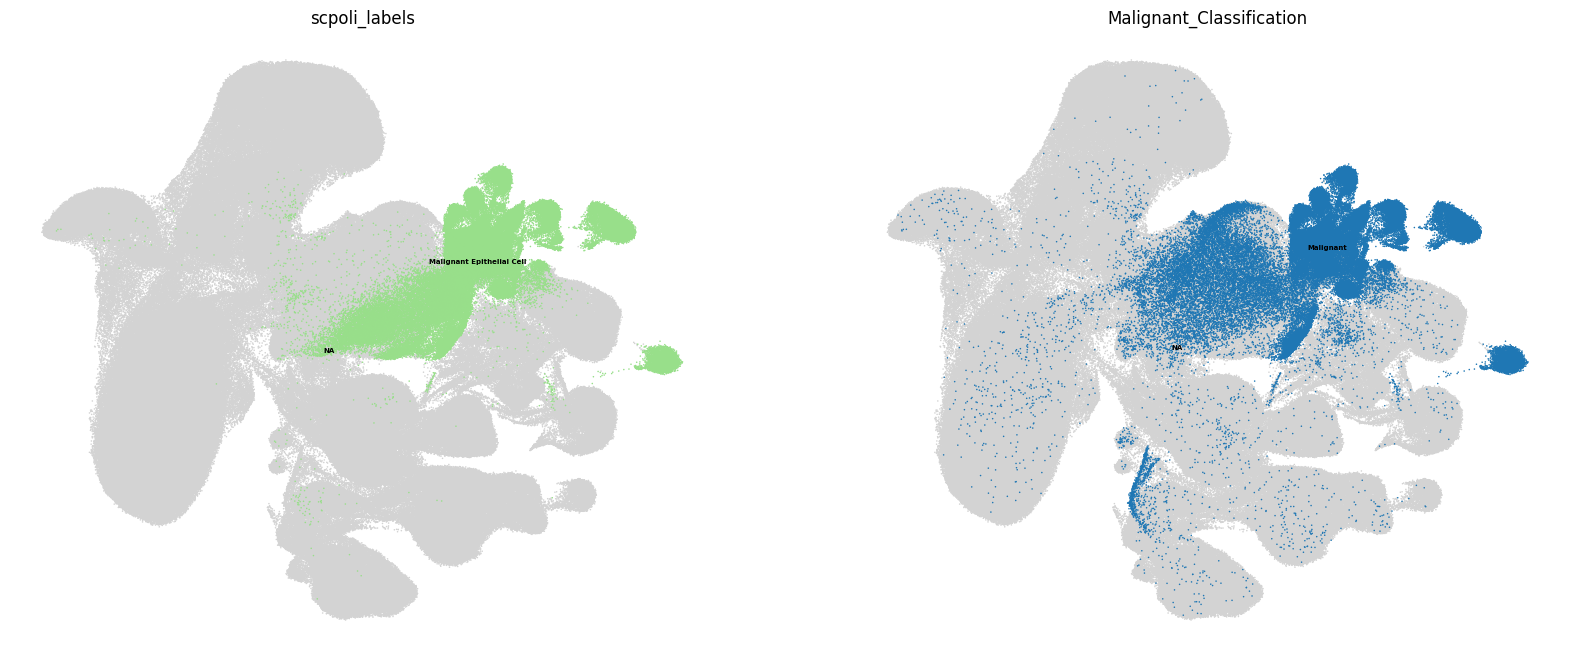

<Figure size 640x480 with 0 Axes>

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sc.pl.umap(adata_umap, color=['scpoli_labels'], groups='Malignant Epithelial Cell', frameon=False, legend_loc="on data",legend_fontsize=5, size=5, show=False, ax=ax1)
sc.pl.umap(adata_umap, color=['Malignant_Classification'], groups='Malignant', frameon=False, legend_loc="on data",legend_fontsize=5, size=5, ax=ax2)
plt.tight_layout()
plt.show()  

In [13]:
adata.obs.groupby(['Malignant_Classification', 'scpoli_labels']).size().unstack().T

Malignant_Classification,Malignant,Non-Malignant
scpoli_labels,,
Acinar cell,329,11535
Adipocyte,18,2074
B cell,85,35568
CAF,197,52133
Ductal Cell,13198,144638
Endocrine Cell,31,16365
Endothelial Cell,227,38601
Epithelial Cell,192,44591
Fibroblast,147,56047


In [20]:
contains_malignant_col1 = adata.obs['Malignant_Classification'].str.startswith('Malignant')
contains_malignant_col2 = adata.obs['scpoli_labels'].str.contains('Malignant', na=False)

count_malignant_col1 = contains_malignant_col1.sum()
count_malignant_col2 = contains_malignant_col2.sum()

print(f"Number of 'Malignant' occurrences in Malignant_Classification: {count_malignant_col1}")
print(f"Number of 'Malignant' occurrences in scpoli_labels: {count_malignant_col2}")

Number of 'Malignant' occurrences in Malignant_Classification: 69088
Number of 'Malignant' occurrences in scpoli_labels: 78711
